In [1]:
# importing libraries

import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import statements required for plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

# machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

#for warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Datasets

In [2]:
original_data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

# Empty list to store columns with categorical data
categorical = []
for col,val in original_data.iteritems():
    if val.dtype == 'object':
        categorical.append(col)

        
# Store the numerical columns in a list numerical
numerical = original_data.columns.difference(categorical)

#store the categorical data in a dataframe called attrition_cat
original_cat = original_data[categorical]
original_cat = original_cat.drop(['EmpNumber'],axis=1)
original_cat = pd.get_dummies(original_cat)


# Store the numerical features to a dataframe attrition_num
original_num = original_data[numerical]
#To remove the target column Performance Rating
original_num = original_num.drop(['PerformanceRating'],axis=1) 

#concat the 2 dataframes together columnwise
original_final = pd.concat([original_num,original_cat],axis=1)

# 1. Department Wise Performances 

In department wise performance, we have to analyze the data by each department present in the category. The DataFrame has to be seperated or sliced according to department wise.

In Employee Department Feature there are six departments available.

- Sales
- Human Resources
- Development 
- Data Science
- Research & Development
- Finance

# Sales Department 

In [3]:
# Taking the Sales Department only
sales = original_data[original_data.EmpDepartment == 'Sales']
sales.head(1)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3


### (i) Performance Rating with respect to number of employees


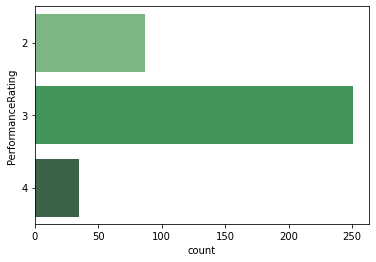

In [4]:
sns.countplot(y='PerformanceRating',data=sales,palette='Greens_d');

### (ii) Performance Rating with respect to Age Group

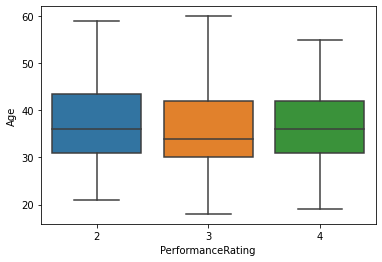

In [5]:
sns.boxplot(sales['PerformanceRating'],sales['Age']);

### (iii) Performance based on Gender 

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

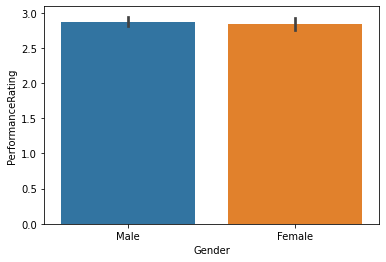

In [6]:
sns.barplot(sales['Gender'],sales['PerformanceRating'])

### (iv)  Performance According to the Experience Level

In [7]:
data = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker':{
            'color':'#3D9970'
        },
        'boxmean':False,
        'orientation':'h',
        'type':'box',
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name':'ExperienceYearsAtThisCompany',
        'marker':{
            'color':'#FF4136',
        },
        'boxmean':False,
        'orientation':'h',
        'type':'box',
    },
    {
        'x':sales['ExperienceYearsInCurrentRole'],
        'y':sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker':{
            'color':'#FF851B',
        },
        'boxmean':False,
        'orientation':'h',
        'type':'box',
    }
]
layout = {
    'xaxis':{
        'title':'Number Of Years',
        'zeroline':False,
    },
    'yaxis':{
        'title':'Performance Rating',
        'zeroline':False,
    },
    'boxmode':'group',
    'title':'Performance According to the Experience Level - Sales',
}
fig=go.Figure(data=data,layout=layout)

py.iplot(fig)

### Human Resources Department 

In [8]:
# taking HR department
hr = original_data[original_data.EmpDepartment == 'Human Resources']

hr.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3


# (i)  Performance Rating based on number of employees

<AxesSubplot:xlabel='count', ylabel='PerformanceRating'>

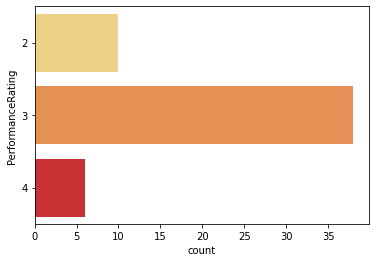

In [9]:
sns.countplot(y='PerformanceRating',data=hr,palette='YlOrRd')

### (ii)  Performance Rating based to Age group

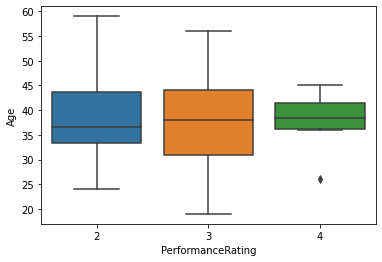

In [10]:
sns.boxplot(hr['PerformanceRating'],hr['Age']);

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

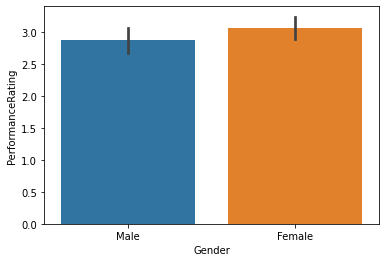

In [11]:
sns.barplot(hr['Gender'],hr['PerformanceRating'])

### (iv)  Performance Based to Experience level

In [12]:
data=[
    {
        'x':hr['TotalWorkExperienceInYears'],
        'y':hr['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker':{
            'color':'#3D9970'
        },
        'boxmean':False,
        'orientation':'h',
        'type':'box',
    },
    {
        'x':hr['ExperienceYearsAtThisCompany'],
        'y':hr['PerformanceRating'],
        'name':'ExperienceYearsAtThisCompany',
        'marker':{
            'color':'#FF4136',
        },
        'boxmean':False,
        'orientation':'h',
        'type':'box',
    },
    {
        'x':hr['ExperienceYearsInCurrentRole'],
        'y':hr['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker':{
            'color':'#FF851B',
        },
        'boxmean':False,
        'orientation':'h',
        'type':'box',
    }
]
layout={
    'xaxis':{
        'title':'Number of Years',
        'zeroline':False,
    },
    'yaxis':{
        'title':'Performance Rating',
        'zeroline':False,
    },
    'boxmode':'group',
    'title':'Performance According to the Experience Level - HR',
}

fig=go.Figure(data=data,layout=layout)

py.iplot(fig)

## Development Department

In [13]:
# taking development department
Development = original_data[original_data.EmpDepartment == 'Development']
Development.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3


### (i) Performance Rating with respect to Number Of Employees

<AxesSubplot:xlabel='count', ylabel='PerformanceRating'>

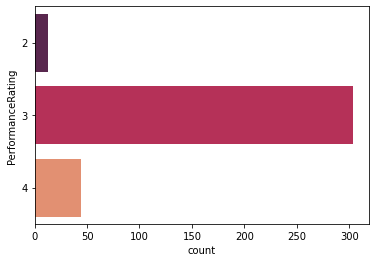

In [14]:
sns.countplot(y='PerformanceRating',data=Development,palette='rocket')

### (ii) Performance Rating Based to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

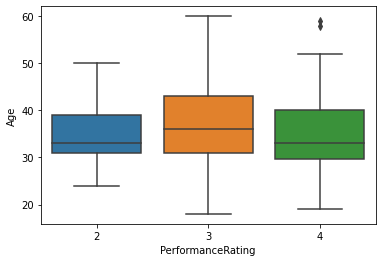

In [15]:
sns.boxplot(Development['PerformanceRating'],Development['Age'])

### (iii)  Performance Based to Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

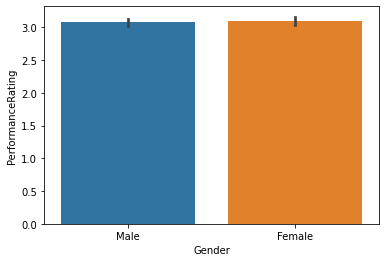

In [16]:
sns.barplot(Development['Gender'],Development['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [17]:
data = [
    {
        'x': Development['TotalWorkExperienceInYears'],
        'y': Development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Development['ExperienceYearsAtThisCompany'],
        'y':Development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Development['ExperienceYearsInCurrentRole'],
        'y': Development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF831B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Development ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Data Science Department 

In [18]:
#targeting Data Science Department
Data_Science = original_data[original_data.EmpDepartment == 'Data Science']
Data_Science.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3


### (i) Performance Rating with respect to Number of Employees

<AxesSubplot:xlabel='count', ylabel='PerformanceRating'>

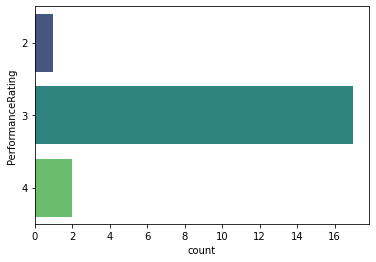

In [19]:
sns.countplot(y='PerformanceRating',data=Data_Science,palette='viridis')

### (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

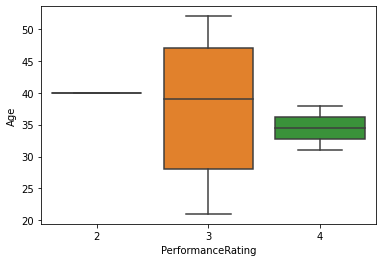

In [20]:
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

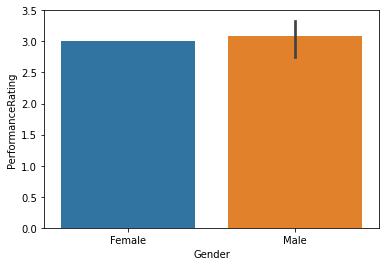

In [21]:
sns.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [22]:
data = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Data Science ',
}

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Research & Development Department

In [23]:
# Targeting R&D Department 
RD = original_data[original_data.EmpDepartment == 'Research & Development'] 
RD.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3


### (i) Performance Rating with respect to number of employees

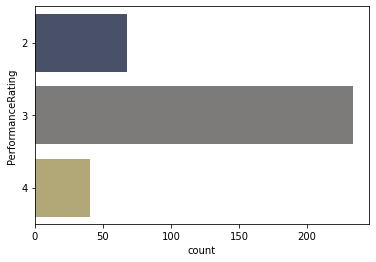

In [24]:
sns.countplot(y="PerformanceRating", data=RD, palette="cividis");

### (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

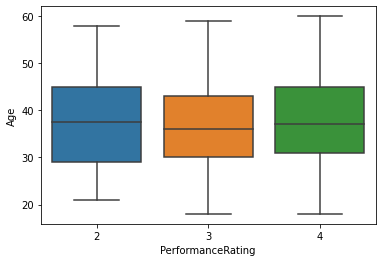

In [25]:
sns.boxplot(RD['PerformanceRating'], RD['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

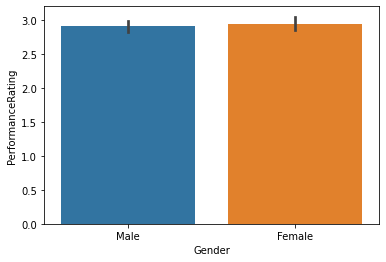

In [26]:
sns.barplot(RD['Gender'], RD['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [27]:
data = [
    {
        'x': RD['TotalWorkExperienceInYears'],
        'y': RD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':RD['ExperienceYearsAtThisCompany'],
        'y':RD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': RD['ExperienceYearsInCurrentRole'],
        'y': RD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - R & D',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Finance Department

In [28]:
# Taking Finance Department
Finance = original_data[original_data.EmpDepartment == 'Finance']
Finance.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3


### (i) Performance Rating with respect to number of employees

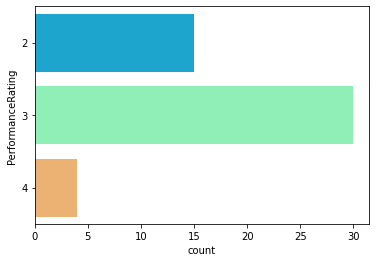

In [29]:
sns.countplot(y="PerformanceRating", data=Finance, palette="rainbow");

### (ii) Performance Rating with respect to Age Group

<AxesSubplot:xlabel='PerformanceRating', ylabel='Age'>

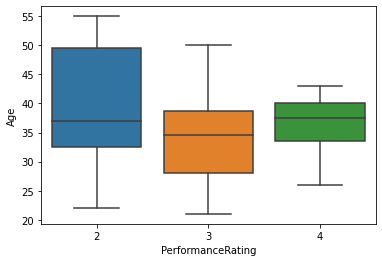

In [30]:
sns.boxplot(Finance['PerformanceRating'], Finance['Age'])

### (iii) Performance based on Gender

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

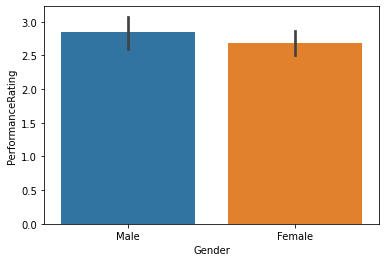

In [31]:
sns.barplot(Finance['Gender'], Finance['PerformanceRating'])

### (iv) Performance According to the Experience Level

In [32]:
data = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Finance ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# 2. Top 3 Important Factors effecting employee performance 

In [33]:
## Percent count of EmpLastSalaryHikePercent with Performance Rating

print("\033[1m\nPercent count of EmpLastSalaryHikePercent with Performance Rating:")
pd.crosstab(original_data["PerformanceRating"], original_data['EmpLastSalaryHikePercent'], margins=True)


Percent count of EmpLastSalaryHikePercent with Performance Rating:


EmpLastSalaryHikePercent,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,All
PerformanceRating,,,,,,,,,,,,,,,,
2,28,30,27,28,11,12,9,10,10,9,4,7,4,2,3,194
3,140,123,138,140,67,54,55,63,51,14,6,13,2,5,3,874
4,1,2,3,4,4,2,3,0,2,27,24,27,15,11,7,132
All,169,155,168,172,82,68,67,73,63,50,34,47,21,18,13,1200


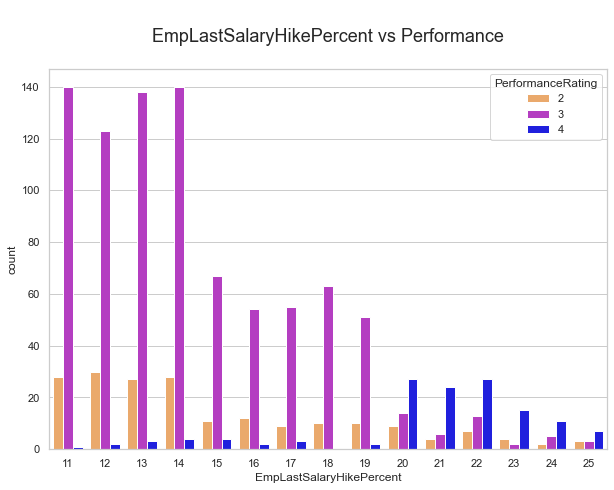

In [34]:
## To plot the graph EmpLastSalaryHikePercent vs Performance 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.countplot(x=original_data['EmpLastSalaryHikePercent'],hue= original_data["PerformanceRating"],palette='gnuplot2_r')
plt.title("\nEmpLastSalaryHikePercent vs Performance\n",fontsize=18)
plt.show()

### From the above graph, we can conclude that

- More Number of Employees whose salary hike percentage belongs to 11% - 14% are getting high Performance Rating.


- Employees whose salary hike percentage is in between 20 - 22%, There Performance Rating is 4.


- Number of Employees belongs to 15 - 19% are moderate in number while employees belongs to 20 - 25% salary hike percent are in less in number.

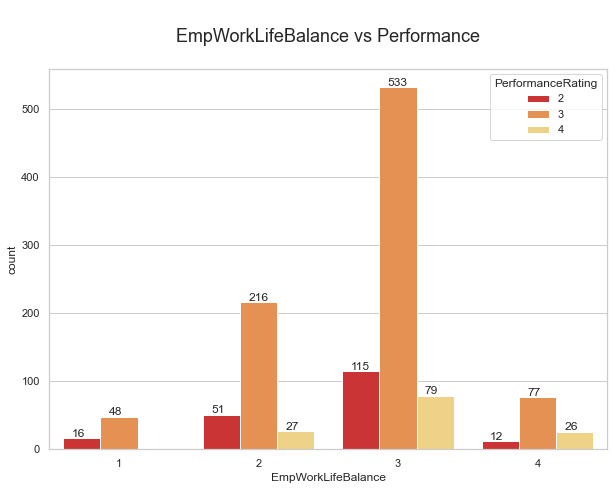

In [35]:
## To plot the graph EmpWorkLifeBalance vs Performance

plt.figure(figsize=(10,7))
ax = sns.countplot(x=original_data['EmpWorkLifeBalance'],hue= original_data["PerformanceRating"],palette='YlOrRd_r')
plt.title("\nEmpWorkLifeBalance vs Performance\n",fontsize=18)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

- In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees.


- In given datastet, level 1 & level 4 employees are less in number.

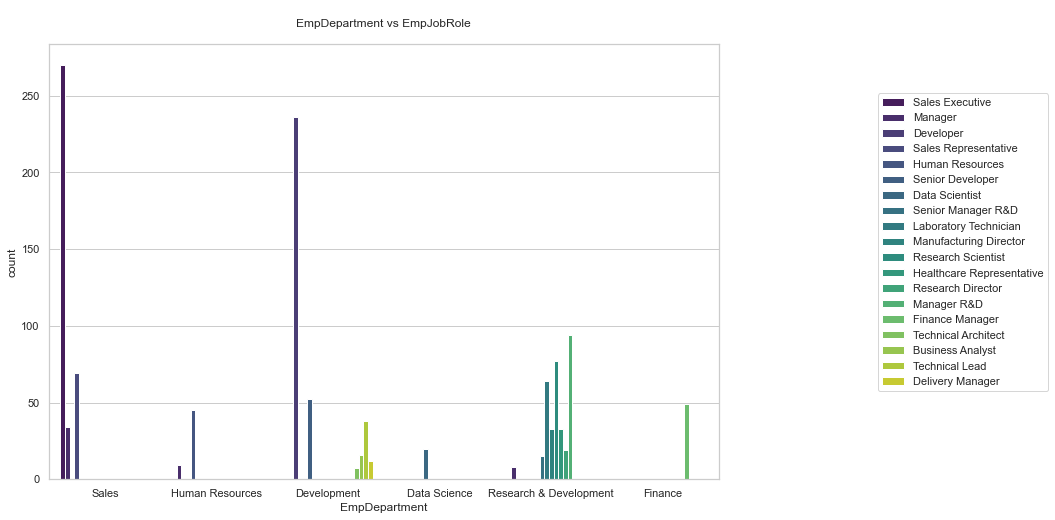

In [36]:
## To visualize the relationship between EmpDepartment vs EmpjobRole

plt.figure(figsize=(12,8))
sns.countplot(x=original_data["EmpDepartment"],hue= original_data['EmpJobRole'],palette='viridis')
plt.title("\nEmpDepartment vs EmpJobRole\n")
plt.legend(bbox_to_anchor=(1.5, 0.9))
plt.show()

        - EmpDepartment is highly correlated with EmpJobRole

In [37]:
# Percent count of Gender with Marital Status

print("\033[1m\nPercent count of Gender with MaritalStatus:")
pd.crosstab(original_data["MaritalStatus"], original_data["Gender"], margins=True)


Percent count of Gender with MaritalStatus:


Gender,Female,Male,All
MaritalStatus,,,
Divorced,98,170,268
Married,215,333,548
Single,162,222,384
All,475,725,1200


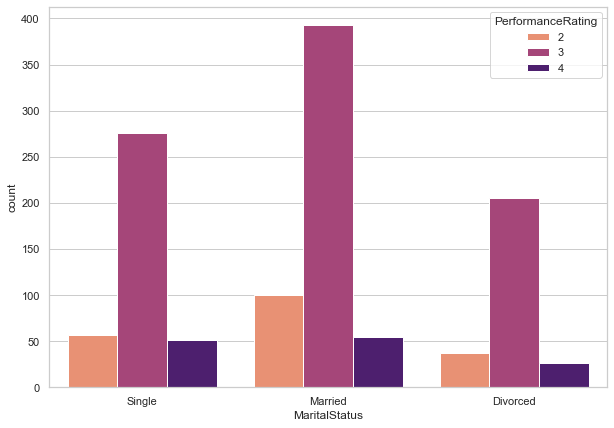

In [38]:
## Plotting the graph for Marital Status

plt.figure(figsize=(10,7))
ax = sns.countplot(x=original_data['MaritalStatus'],hue= original_data["PerformanceRating"],palette='magma_r')

- Married, Single & Divorced employees gives good performance rating.


- In given dataset, married employees are more in number after that Single & Divorced employees.

In [39]:
# To visualize the performance rating in all numerical features

num_cols = original_data.loc[:,['EmpEducationLevel','EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction','EmpRelationshipSatisfaction',
       'TrainingTimesLastYear','EmpWorkLifeBalance']]


                                                       Performance Rating                                                       



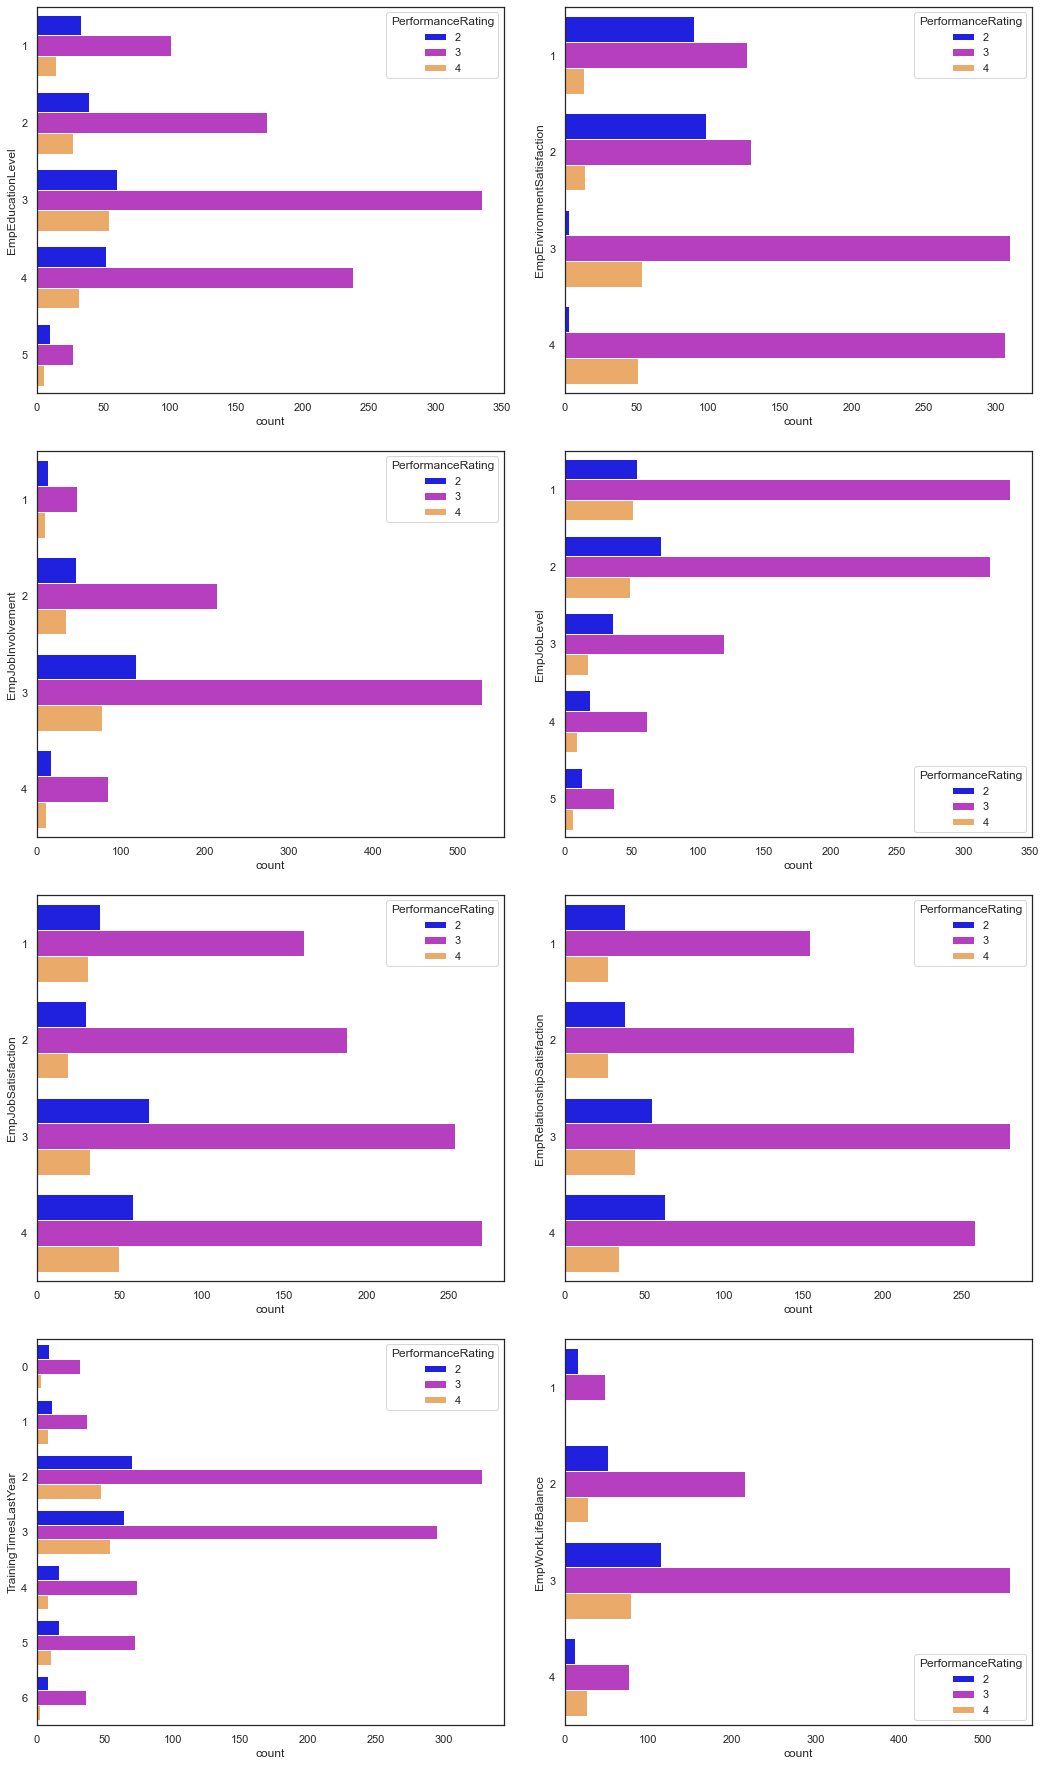

In [40]:
# To plot the Performance Rating of all numerical Features

fig = plt.figure(figsize=(15,25))

txt = "Performance Rating"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(num_cols.columns)):
    plt.subplot(4,2,index+1)
    sns.countplot( y =num_cols.iloc[:,index],hue=original_data["PerformanceRating"],palette='gnuplot2')
fig.tight_layout(pad=2)

### From the above plots, we get following insights:


- The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count.


- Employees are worked in the multiple companies up to 8 companies where most of the employees worked up to 2 companies before getting to work here.


- The hourly rate range is 65 to 95 for majority employees work in this company. 


- In General, Most of Employees work up to 5 years in this company. Most of the employees get 11% to 15% of salary hike in this company.

In [41]:
del original_data['EmpNumber']

In [42]:
# For analysing the object type data

obj_cols  = original_data.select_dtypes(include="object")
obj_cols.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')


                                               Analysis for Categorical type data                                               



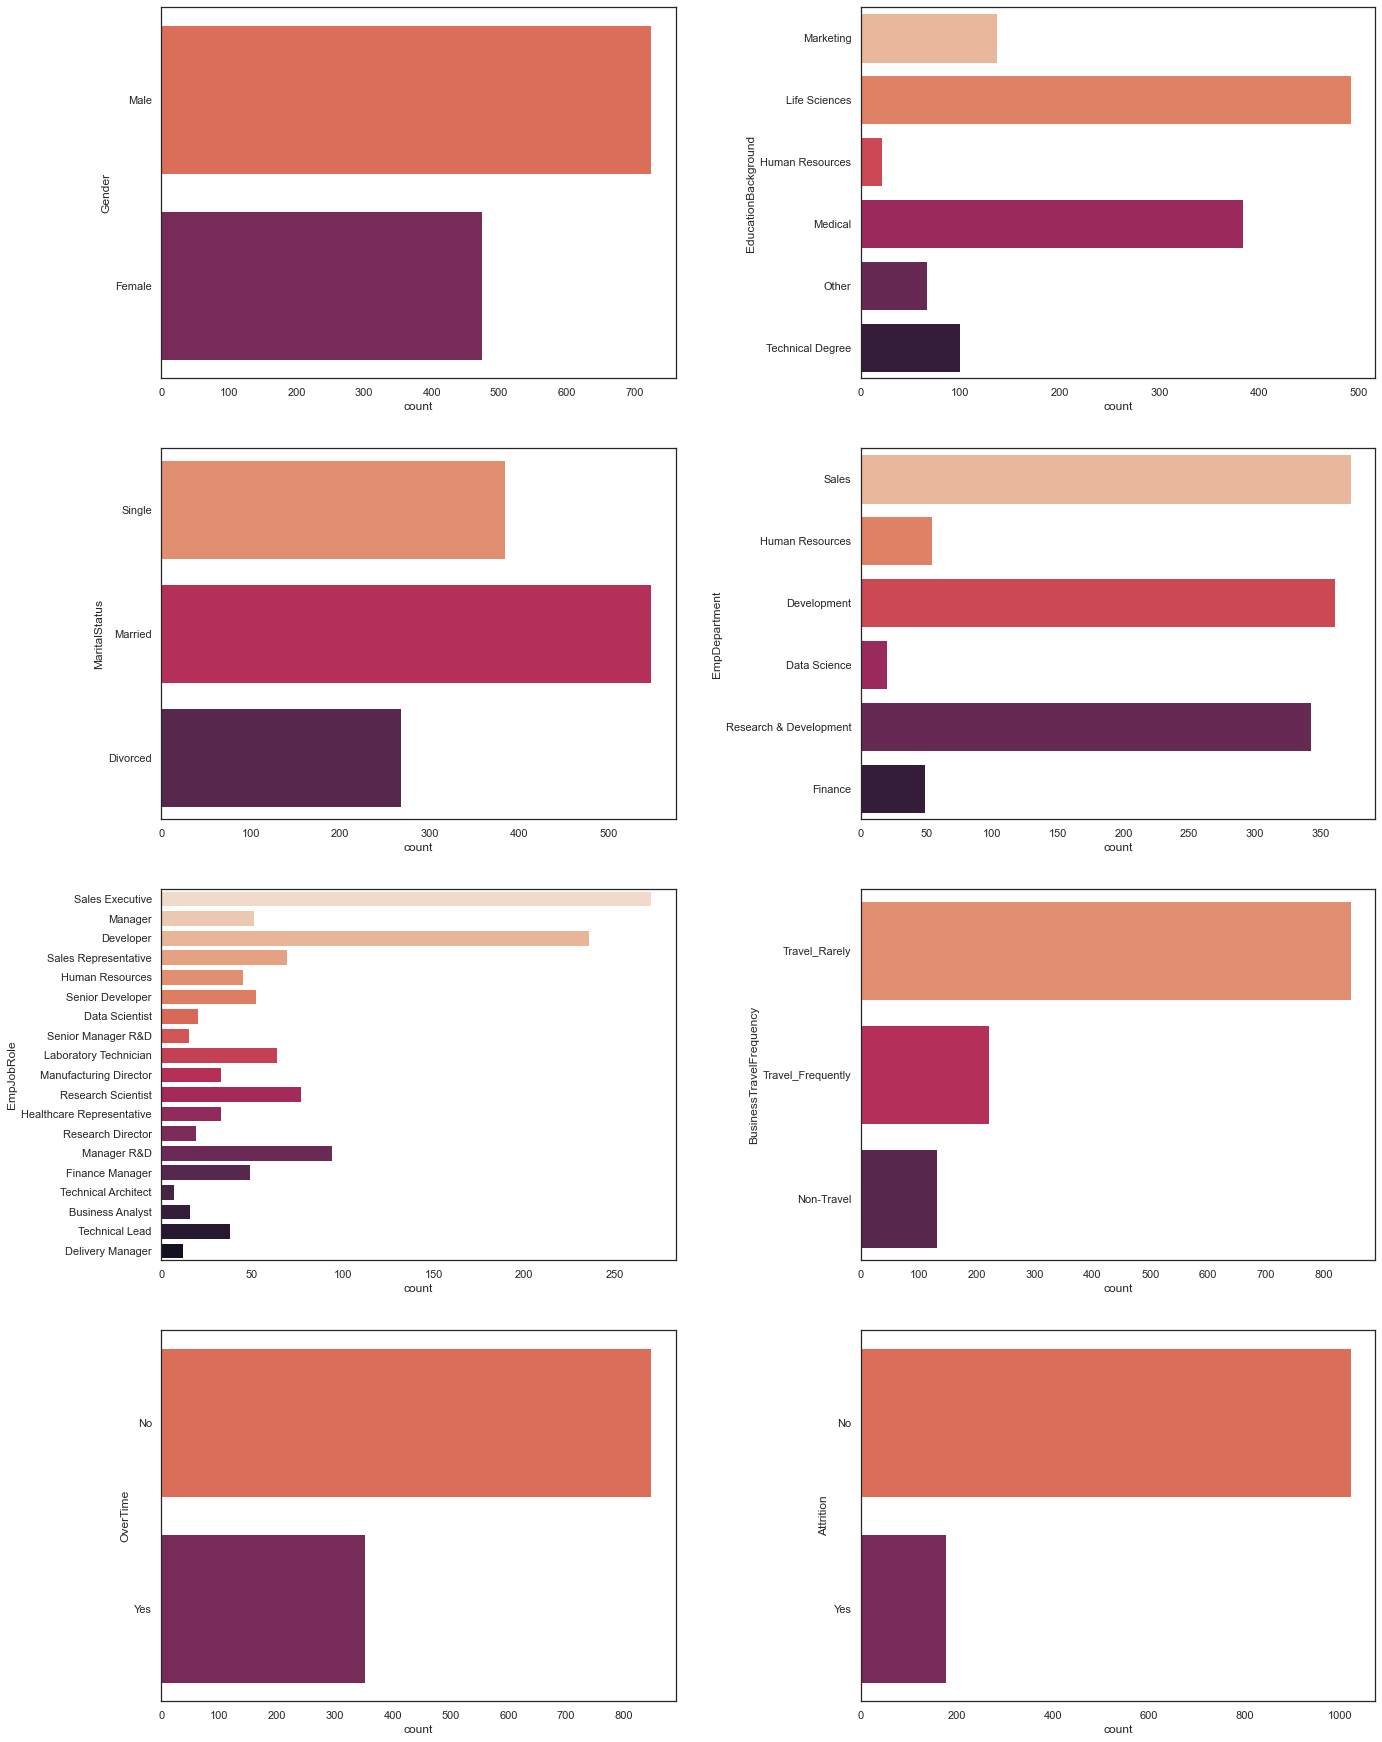

In [43]:
# Analysis for object type data

fig = plt.figure(figsize=(20,25))

txt = "Analysis for Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(obj_cols.columns)):
    plt.subplot(4,2,index+1)
    sns.countplot( y =obj_cols.iloc[:,index],palette='rocket_r')
fig.tight_layout(pad=3)

### From the above plots, we get following insights:


- The Gender variance is divided by 60% of Male employees and 40% of Female employees in the company.


- The number of the educational backgrounds present in the employees is six unique backgrounds.


- Nineteen unique employee job roles are present in this company.


- The most of the employees are having the education level of 3


- The Job satisfaction level in this company is high level for the majority of employees.


- The 85% of employees are not having attrition in their work


- Only 11% of employees in the company were achieved level 4 - performance rating


- The overall percentage of employees doing overtime is 30%